In [ ]:
%matplotlib inline

# Assignment 2

**DUE: Sunday October 23 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
dNAME = "Mahyar Vahabi"
STUDENT_ID = "1798645"

## Problem 1 - Yield Dataset with Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as snsf

This dataset of size $n = 15$ contains measurements of yield from an experiment done at five different temperature levels. The variables are $y = yield$ and $x = temperature$ in degrees Fahrenheit. Download the data from PyDrive.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1Oikuudc0715xr2QezMpKTNAD4_SdMfH3"})
downloaded.GetContentFile('yield.csv')  

In [ ]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [ ]:
data.info(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   50      14 non-null     int64  
 1   3.3     14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


In [ ]:
# Let's look at the data
data

,50,3.3
0,50,2.8
1,50,2.9
2,70,2.3
3,70,2.6
4,70,2.1
5,80,2.5
6,80,2.9
7,80,2.4
8,90,3.0
9,90,3.1


In [ ]:
# Look at data description
data.describe()

,50,3.3
count,14.000000,14.00000
mean,80.000000,2.80000
std,16.641006,0.38829
min,50.000000,2.10000
25%,70.000000,2.52500
50%,80.000000,2.85000
75%,90.000000,3.00000
max,100.000000,3.50000


In [ ]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

train_index = np.argsort( X_train )
test_index = np.argsort( X_test )

np.take_along_axis( y_train , train_index, axis = 0)
np.take_along_axis( y_test , test_index, axis = 0)

np.sort(X_train)
np.sort(X_test)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### a) Linear Regression (10 points)

We will run a simple linear regression on this well-curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [ ]:
# code 
'''
Given X, y data and a LinearRegression object, returns two points representing
the regression line fitting the given data's scale.
'''
def compute_line_from_regr(X_data, y_data, regr):
    l_bound = np.min(X_data)
    r_bound = np.max(X_data)
    return [l_bound, r_bound], [l_bound * regr.coef_ + regr.intercept_, r_bound * regr.coef_ + regr.intercept_]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import datasets
# Instantiate LinearRegression
regressor = linear_model.LinearRegression()
### YOUR CODE HERE ### 

# Fit the regressor using X_train and y_train

### YOUR CODE HERE ###
regressor.fit(X_train, y_train)


LinearRegression()

Let's now visually inspect the model and see how well this model predicts the yield. 
* First, plot the yield vs. temperature points from training set in black.
* Then, plot the regression line in red. Predictions from the regression model lie along the red line.

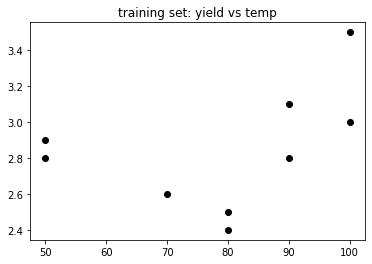

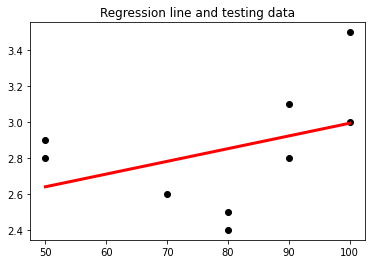

In [ ]:
# Plot the actual yield (y_train) vs. temperature values from training set

### YOUR CODE HERE ###
line_x, line_y = compute_line_from_regr(X_train, y_train, regressor)
plt.scatter(X_train, y_train, color='black')
plt.title('training set: yield vs temp')
plt.show()

# Plot the regression line

### YOUR CODE HERE ###
line_x, line_y = compute_line_from_regr(X_train, y_train, regressor)
plt.scatter(X_train, y_train, color='black')
plt.plot(line_x, line_y, color='red', linewidth=3)
plt.title('Regression line and testing data')
plt.show()


Let's also visually inspect the prediction results from the test set.
* First, plot the yield vs. temperature points from the test set in black
* Then plot the regression line in red to see how prediction is similar to or different from the actual target.

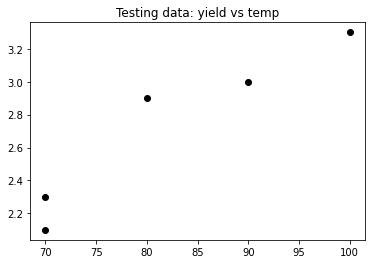

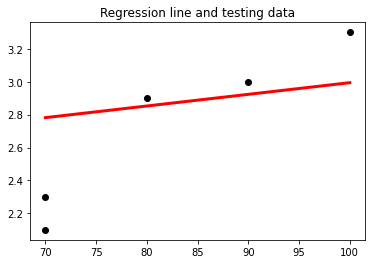

In [ ]:
# Plot the actual yield (y_test) vs. temperature values  for the test set

### YOUR CODE HERE ###
line_x, line_y = compute_line_from_regr(X_test, y_test, regressor)
plt.scatter(X_test, y_test, color='black')
plt.title('Testing data: yield vs temp')
plt.show()

# Plot the regression line

### YOUR CODE HERE ###
line_x, line_y = compute_line_from_regr(X_test, y_test, regressor)
plt.scatter(X_test, y_test, color='black')
plt.plot(line_x, line_y, color='red', linewidth=3)
plt.title('Regression line and testing data')
plt.show()

### b) Inspecting Linear Regression Model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

[From this scatter plot, we can see that that our linear regression model does not really fit the shape of the graph. Generally, linear regression does not always work out for the best and makes the model a bad fit and underfitting]

Does the model display signs of underfitting? If so, why?

[This model is a hundred percent underfitting, because of how scatterd our data is and the line passes through nearly non of the points. It cannot capture the underlying trend of the data and so it is forced to make up the a jank linear line that doesn't work with non-linear shaped datas.]

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)}
$$

We have:

$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 {x^{(i)}}^2 + \cdots + \theta_d {x^{(i)}}^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}$$

Then our new higher order $\hat Y$ is computed same as before.

$$ \hat Y =  X \theta =
\begin{bmatrix}
    1 & x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    1 & x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x^{(1)} + \theta_2 {x^{(1)}}^2 + \cdots + \theta_{d}  {x^{(1)}}^d \\
    \theta_0 + \theta_1 x^{(2)} + \theta_2 {x^{(2)}}^2 + \cdots + \theta_{d}  {x^{(2)}}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x^{(n)} + \theta_2 {x^{(n)}}^2 + \cdots + \theta_{d}  {x^{(n)}}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y^{(1)} \\ \hat y^{(2)} \\ \vdots \\ \hat y^{(n)} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
# First, lets look at the values of X_train
print(X_train)

[[100]
 [ 90]
 [ 50]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 80]
 [100]]


In [ ]:
print(y_train)

[3.  3.1 2.9 2.4 2.8 2.6 2.8 2.5 3.5]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Creates polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [ ]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = linear_model.LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_train_pol and y_train

### YOUR CODE HERE ###
regressor.fit(X_train_pol, y_train)

LinearRegression()

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. 

Plot the yield vs. temperature points in black along with the polynomial regression line in red. Hint: For plotting the regression line, you can use the plot function to interpolate the regression line based on the model's prediction on data points.

In [ ]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {o}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

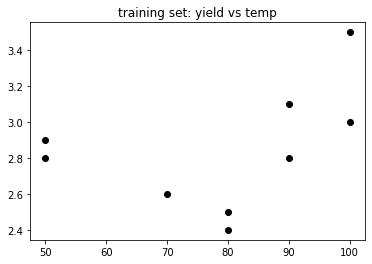

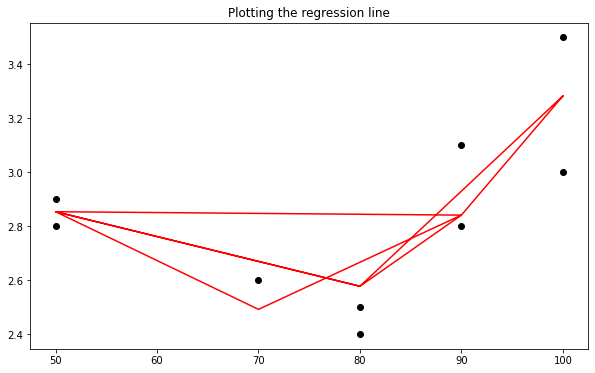

In [ ]:
# Plot the actual yield (y_train) vs temp. values from training set

### YOUR CODE HERE ###
line_x, line_y = compute_line_from_regr(X_train, y_train, regressor)
plt.scatter(X_train, y_train, color='black')
plt.title('training set: yield vs temp')
plt.show()

# Plot the regression line

### YOUR CODE HERE ###
# line_x, line_y = compute_line_from_regr(X_train, y_train, regressor)
# plt.scatter(X_train, y_train, color='black')
# plt.plot(line_x, line_y, color='red', linewidth=3)
# plt.title('Regression line and testing data')
# plt.show()
y_pol = regressor.predict(X_train_pol)
plt.figure(figsize=(10, 6))
plt.title("Plotting the regression line")
plt.scatter(X_train, y_train, c="black")
plt.plot(X_train, y_pol, c="red")
plt.show()


Lastly, let's plot the test set yield vs. temperature points along with the polynomial regression line.

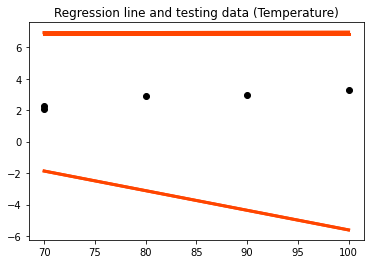

In [ ]:
# Plot the actual yield (y_test) vs temp. values from test set

### YOUR CODE HERE ###
line_x, line_y = compute_line_from_regr(X_test, y_test, regressor)

plt.scatter(X_test, y_test, color='black')
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and testing data (Temperature)')


### YOUR CODE HERE ###
plt.plot(line_x, line_y, color='orangered', linewidth=3)
plt.title('Regression line and testing data (Temperature)')
plt.show()

### d) Inpsecting Polynomial Regression Model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

[Yes, it is a better fit as it curves to form a shape closer to the scatter plot points rather than being one straight line that best fits the entirety of the scatter plot points.]

Does the model address display more or less underfitting than the simple linear regression model and why?

[The model displays less underfitting than the simple linear regression model, because its regression line generally fits closer to the points on this scatter plot.]

## Problem 2 - Fish Dataset

## Importing the Dataset

We will now perform different variations of linear regression to predict fish weight given species type, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram (g)

- Length1: vertical length in (cm)

- Length2: diagonal length in (cm)

- Length3: cross length in (cm)

- Height: height in (cm)

- Width: diagonal width in (cm)

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"13Q2WAaDIP6D5yrQlLV3OMnkmcwxcAwHz"})
downloaded.GetContentFile('Fish.csv')  

In [ ]:
import pandas as pd

# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [ ]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [ ]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [ ]:
# Delete any rows for which there is a measurement of 0.0 for weight.
### YOUR CODE HERE ###
indexes = fish_data[fish_data['Weight'] == 0.0].index
fish_data.drop(indexes, inplace=True)

# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 standard deviations from the mean as our cut-off, and using the data listed using the describe function above, are there any outliers?

In [ ]:
# code cittion: Class Excercise - Lecture 2 colab
def standardize_col(col):
    return (col - col.mean()) / col.std()

In [ ]:
### YOUR CODE HERE ###
# make a temp copy of fish data and standarize every column
fish_new = (fish_data - fish_data.mean())/fish_data.std()
# can't think to write a function to make this next part easier
# but for each column check to see if we have values smaller and greater
# than 4 in each transformed columns, find the indexes and drop them
WE_greater4= fish_new[fish_new['Weight'] > 4].index
WE_smaller4 = fish_new[fish_new['Weight'] < -4].index

L1_greater4= fish_new[fish_new['Length1'] > 4].index
L1_smaller4 = fish_new[fish_new['Length1'] < -4].index

L2_greater4= fish_new[fish_new['Length2'] > 4].index
L2_smaller4 = fish_new[fish_new['Length2'] < -4].index

L3_greater4= fish_new[fish_new['Length3'] > 4].index
L3_smaller4 = fish_new[fish_new['Length3'] < -4].index

H_greater4= fish_new[fish_new['Height'] > 4].index
H_smaller4 = fish_new[fish_new['Height'] < -4].index

WI_greater4= fish_new[fish_new['Width'] > 4].index
WI_smaller4 = fish_new[fish_new['Width'] < -4].index

#drop these indexes from the actual data frame and delete the fish_new
fish_data.drop(WE_greater4, inplace = True)
fish_data.drop(WE_smaller4, inplace = True)

fish_data.drop(L1_greater4, inplace = True)
fish_data.drop(L1_smaller4, inplace = True)

fish_data.drop(L2_greater4, inplace = True)
fish_data.drop(L2_smaller4, inplace = True)

fish_data.drop(L3_greater4, inplace = True)
fish_data.drop(L3_smaller4, inplace = True)

fish_data.drop(H_greater4, inplace = True)
fish_data.drop(H_smaller4, inplace = True)

fish_data.drop(WI_greater4, inplace = True)
fish_data.drop(WI_smaller4, inplace = True)

#print data
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  158 non-null    object 
 1   Weight   158 non-null    float64
 2   Length1  158 non-null    float64
 3   Length2  158 non-null    float64
 4   Length3  158 non-null    float64
 5   Height   158 non-null    float64
 6   Width    158 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


[There were no outliers and I now look like an idiot. I realized that I could have just used 4 std from the mean to plus and minus the range of values (not considered as outliers) and compare this range to the actual values held for their minimum and maximum.]

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [ ]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# Print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# Print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [ ]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = linear_model.LinearRegression() ### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train, y_fish_train)


LinearRegression()

Now let's see how we did and generate predictions for X_fish_test. Then print predicted values and actual target values side-by-side for a visual comparison.

In [ ]:
# Generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test) ### YOUR CODE HERE ### 

# Print the predictions along with actual weights
### YOUR CODE HERE ### 
print("y_fish_pred:\t\t y_fish_test:")
for i in range(len(y_fish_pred)):
    print(y_fish_pred[i], "\t", y_fish_test[i])

y_fish_pred:		 y_fish_test:
476.5911788231239 	 390.0
207.9929561343153 	 160.0
696.6127779796425 	 700.0
829.8356241968233 	 1015.0
155.66081610908924 	 120.0
839.4307731235601 	 1100.0
756.4245421886376 	 820.0
860.9053846020513 	 950.0
648.0651893666604 	 556.0
194.3693561652255 	 145.0
656.3311559338006 	 700.0
988.3533044034291 	 1600.0
694.4190899537582 	 720.0
27.97315647136844 	 55.0
90.4049206066108 	 85.0
279.88428527811055 	 188.0
426.5171449059047 	 300.0
253.2749712393798 	 180.0
988.3533044034291 	 1550.0
380.413825535969 	 306.0
203.77329399786692 	 140.0
873.1342266822826 	 975.0
776.42866651791 	 1000.0
514.645291232129 	 450.0
156.25494339977575 	 110.0
98.82407554183447 	 78.0
423.3405775079619 	 300.0
638.7605513223941 	 650.0
-203.30791321585656 	 6.7
611.8753010365667 	 514.0
352.8777398627022 	 290.0
307.75783507086004 	 270.0


### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print(mean_squared_error(y_fish_test, y_fish_pred))

# Compute the coefficient of determination using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print(r2_score(y_fish_test, y_fish_pred))


31561.77306754145
0.8245122776931346


Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

[31561.77306754145]

Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

[0.8245122776931346]

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures()### YOUR CODE HERE ###

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train)### YOUR CODE HERE ###
X_fish_test_pol = poly.fit_transform(X_fish_test)### YOUR CODE HERE ###

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
### YOUR CODE HERE ###
print(X_fish_train_pol[0:5])

[[1.00000000e+00 3.04000000e+01 3.30000000e+01 3.83000000e+01
  1.48604000e+01 5.28540000e+00 9.24160000e+02 1.00320000e+03
  1.16432000e+03 4.51756160e+02 1.60676160e+02 1.08900000e+03
  1.26390000e+03 4.90393200e+02 1.74418200e+02 1.46689000e+03
  5.69153320e+02 2.02430820e+02 2.20831488e+02 7.85431582e+01
  2.79354532e+01]
 [1.00000000e+00 3.48000000e+01 3.73000000e+01 3.98000000e+01
  6.28840000e+00 4.01980000e+00 1.21104000e+03 1.29804000e+03
  1.38504000e+03 2.18836320e+02 1.39889040e+02 1.39129000e+03
  1.48454000e+03 2.34557320e+02 1.49938540e+02 1.58404000e+03
  2.50278320e+02 1.59988040e+02 3.95439746e+01 2.52781103e+01
  1.61587920e+01]
 [1.00000000e+00 4.00000000e+01 4.25000000e+01 4.55000000e+01
  6.82500000e+00 4.45900000e+00 1.60000000e+03 1.70000000e+03
  1.82000000e+03 2.73000000e+02 1.78360000e+02 1.80625000e+03
  1.93375000e+03 2.90062500e+02 1.89507500e+02 2.07025000e+03
  3.10537500e+02 2.02884500e+02 4.65806250e+01 3.04326750e+01
  1.98826810e+01]
 [1.00000000e+00

Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = linear_model.LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train_pol and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train_pol, y_fish_train)

LinearRegression()

Now let's see how we did with the second model and generate predictions using X_fish_test_pol. Then print predicted values and actual target values side-by-side for a visual comparison.

In [ ]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol)### YOUR CODE HERE ### 

# Print the predictions along with actual weights
### YOUR CODE HERE ###
print("y_fish_pol_pred:\t\t y_fish_test:")
for i in range(len(y_fish_pol_pred)):
    print(y_fish_pol_pred[i], "\t", y_fish_test[i])

y_fish_pol_pred:		 y_fish_test:
410.7816173430182 	 390.0
144.99000843059122 	 160.0
661.0899461816323 	 700.0
916.2093863540233 	 1015.0
120.28326145948392 	 120.0
892.2945253778635 	 1100.0
779.3303627505404 	 820.0
970.513720576776 	 950.0
613.9718885345345 	 556.0
138.7568509471924 	 145.0
702.9669446833437 	 700.0
1200.8808098546658 	 1600.0
736.0196461334201 	 720.0
68.24127115649014 	 55.0
65.4187035093226 	 85.0
204.06717258294225 	 188.0
348.32997005295204 	 300.0
164.86007087658982 	 180.0
1200.8808098546658 	 1550.0
301.2936467564483 	 306.0
132.03878287235457 	 140.0
1080.9518492396282 	 975.0
800.5548871861488 	 1000.0
465.06392927910895 	 450.0
113.12282845044044 	 110.0
78.16667223767863 	 78.0
337.9263526033892 	 300.0
610.8883810801682 	 650.0
14.314256689567003 	 6.7
526.2784399152637 	 514.0
265.75936168111843 	 290.0
235.08321339093163 	 270.0


### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the MSE and R-squared using y_fish_test and y_fish_pol_pred

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
print(mean_squared_error(y_fish_test, y_fish_pol_pred))

# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
print(r2_score(y_fish_test, y_fish_pol_pred))

12552.64579521112
0.9302055934939892


Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

[12552.64579521112]

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

[0.9557844480266899]

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [ ]:
# Create a copy of fish_data
fish_data_species = fish_data

# Begin by generating a dictionary that maps all unique species in fish_data to a unique id
level_dict = {spec:i for i, spec in enumerate(fish_data_species['Species'].unique())}### YOUR CODE HERE ###

# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    ### YOUR CODE HERE ###
    return level_dict[level]

# Apply the function to the Species column and store in Species column 
#(you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = fish_data_species['Species'].apply(integer_encode_level) ### YOUR CODE HERE ###

# Check data
fish_data_species

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


We will now create a dataset with 1 target column and 6 feature columns: Species, Length1, Length2, Length3, Height, Width. 

In [ ]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 1] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

# Print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# Print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())

X_fish_categorical.head():
   Species  Length1  Length2  Length3   Height   Width
0        0     23.2     25.4     30.0  11.5200  4.0200
1        0     24.0     26.3     31.2  12.4800  4.3056
2        0     23.9     26.5     31.1  12.3778  4.6961
3        0     26.3     29.0     33.5  12.7300  4.4555
4        0     26.5     29.0     34.0  12.4440  5.1340

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [ ]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = linear_model.LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
### YOUR CODE HERE ###
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)


LinearRegression()

Let's check the predictions for this model and generate predictions using X_fish_test_categorical. Then print target and estimated weight values side-by-side.

In [ ]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical)### YOUR CODE HERE ### 


# Print the predictions along with actual weights
### YOUR CODE HERE ### 
print("y_fish_pred_categorical: y_fish_test:")
for i in range(len(y_fish_pred_categorical)):
    print(y_fish_pred_categorical[i], "\t", y_fish_test_categorical[i])

y_fish_pred_categorical: y_fish_test:
462.416225042645 	 390.0
140.4634233239516 	 160.0
707.8190370938319 	 700.0
871.1228324376718 	 1015.0
143.05409674330951 	 120.0
843.1293791398473 	 1100.0
769.577519442686 	 820.0
868.4968023862295 	 950.0
666.5983991340825 	 556.0
194.15313937916392 	 145.0
672.8149122816367 	 700.0
960.5133024202776 	 1600.0
736.9098617610277 	 720.0
-2.954443624020314 	 55.0
41.01945185685008 	 85.0
284.75537217699616 	 188.0
561.7345642602934 	 300.0
224.74914600519628 	 180.0
960.5133024202776 	 1550.0
350.8427264339248 	 306.0
72.02506985270907 	 140.0
829.1424727559754 	 975.0
732.947821397205 	 1000.0
509.4816319943018 	 450.0
42.6391043249987 	 110.0
-17.639798181496417 	 78.0
419.5986666208787 	 300.0
639.9048373439814 	 650.0
-123.28748212907487 	 6.7
564.1381405481825 	 514.0
296.0903452670093 	 290.0
277.2483153715442 	 270.0


### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [ ]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###
print(mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical))
# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###
print(r2_score(y_fish_test_categorical, y_fish_pred_categorical))


34678.465368212965
0.8071830474307615


Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

[34678.465368212965]

Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

[0.8071830474307615]

### g) Researching for the Best Model (15 points)

Read [this](https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/) tutorial to see how you can control the degree of the polynomial and train a **Regularized** linear regression model.

In the cell below, investigate and show your observations on:
1. Which features are important?
2. What polynomial order is appropriate for the model to have an appropriate fit (no overfitting or underfitting)?
3. The impact of regularization (L2 norm or L1 norm) and the regularizer factor/parameter on model's generalization capability.
4. Finally, report your best model (including model's cost function, regularizer, regularizer factor, and polynomial order) along with a plot of model's performance on the training data and test data. We expect this model to perform better than all prior models you trained.

In [ ]:
### YOUR CODE HERE ###

[YOUR ANSWER HERE]